# Machine learning and Statistics - Project

### Student: Doris Zdravkovic

The aim of this project is to create a web service that uses machine learning to make predictions based on the data set powerproduction. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. I will then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests. 

In [190]:
import numpy as np
# pandas is used to read in the csv and display in a pandas dataframe
import pandas as pd 
# matplotlib pyplot will be used for plotting the data set
import matplotlib.pyplot as plt
# seaborn will be used for plotting the data set
import seaborn as sns

In [191]:
# reading in the data set with pandas
df = pd.read_csv("powerproduction.csv")
# displaying the datas set
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [192]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [193]:
# shape of the data set. It has 500 rows and 2  columns
df.shape

(500, 2)

In [194]:
# first 10 rows of dataset
df.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [195]:
# tells us more about the table (mean, std...)
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


Firstly, I am going to explain each of these functions independently. As we can see, there are only 2 variables in this table, speed and power. It shows frame or a series of numeric values.

- count: In the table above count is 500 which means that count represents the size of the data set.

- mean: Mean or Average is a central tendency of the data i.e. a number around which a whole data is spread out. In a way, it is a single number which can estimate the value of whole data set.

- std: Standard deviation is the measurement of average distance between each quantity and mean. That is, how data is spread out from mean. A low standard deviation indicates that the data points tend to be close to the mean of the data set, while a high standard deviation indicates that the data points are spread out over a wider range of values.

- min: Shows the smallest data figure collected, in this case it is zero.

- 25%: Also called first quartile. It means that 25% of data falls behind this measurement, and 75% is above it.

- 50%: The 50 percentile is the same as the median. Half of the data collected falls behind this measurement.

- 75%: Also called third quartile. It means that 75% of data falls behind this measurement, and 25% is above it.

- max: Shows the highest data figure collected, ie. maximum speed and power.

https://www.investopedia.com/terms/d/descriptive_statistics.asp

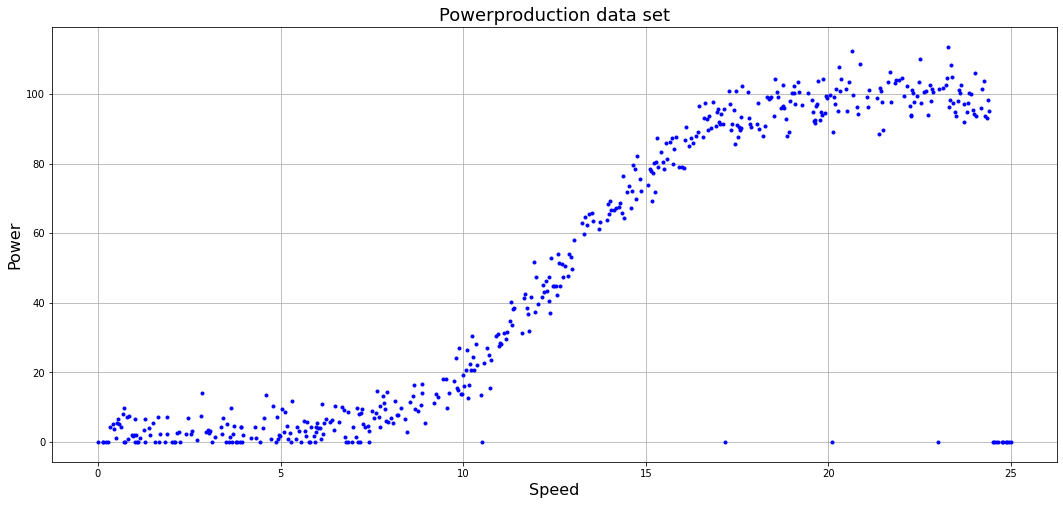

In [196]:
# Code adapted from: https://matplotlib.org/tutorials/introductory/customizing.html
plt.rcParams['figure.figsize'] = (18, 8)
plt.rcParams['lines.linewidth'] = 2.0

# matplotlib.pyplot used for plotting speed and power 
plt.plot(df['speed'], df['power'], '.b')
# adding a title to the plot
plt.title('Powerproduction data set', fontsize=18)
# adding labels to the x (speed) and y (power) axis
plt.xlabel('Speed', fontsize=16)
plt.ylabel('Power', fontsize=16)
# displaying grid on the plot
plt.grid()
# showing the plot
plt.show()

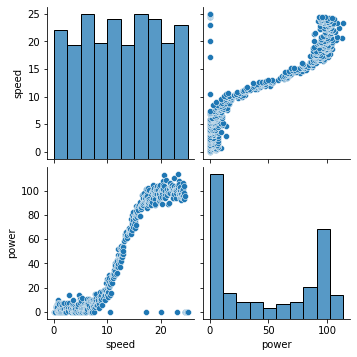

In [197]:
sns.pairplot(df)


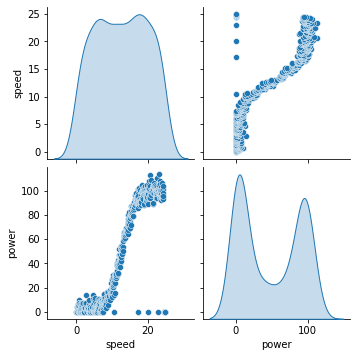

In [198]:
sns.pairplot(df, diag_kind = 'kde')

In [199]:
# cleaning the dataset by removing all data points where the power output is zero.


df = df[df['power'] !=0]
df

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


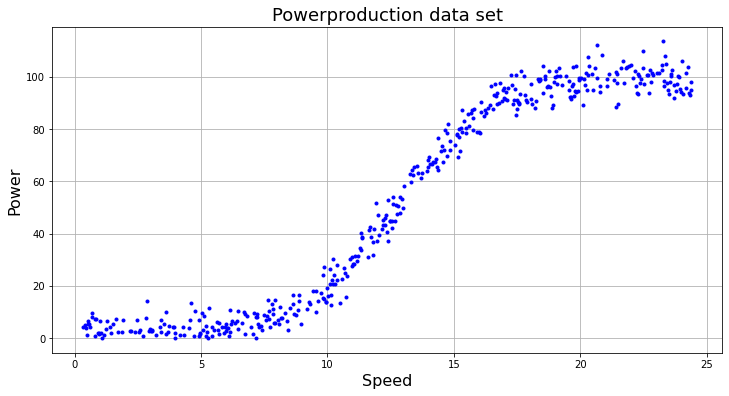

In [200]:
# Code adapted from: https://matplotlib.org/tutorials/introductory/customizing.html
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['lines.linewidth'] = 1.0

# matplotlib.pyplot used for plotting speed and power 
plt.plot(df['speed'], df['power'], '.b')
# adding a title to the plot
plt.title('Powerproduction data set', fontsize=18)
# adding labels to the x (speed) and y (power) axis
plt.xlabel('Speed', fontsize=16)
plt.ylabel('Power', fontsize=16)
# displaying grid on the plot
plt.grid()
# showing the plot
plt.show()

#### Model 1: Linear regression

Linear regression is a basic and commonly used type of predictive analysis.  The overall idea of regression is to examine two things: 
1. does a set of predictor variables do a good job in predicting an outcome (dependent) variable?  
2. Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?  

These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.  https://www.statisticssolutions.com/what-is-linear-regression/

With simple linear regression when we have a single input, we can use statistics to estimate the coefficients. This requires that you calculate statistical properties from the data such as means, standard deviations, correlations and covariance. All of the data must be available to traverse and calculate statistics. https://machinelearningmastery.com/linear-regression-for-machine-learning/

Preparing Data For Linear Regression:

1. Linear Assumption. Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. You may need to transform data to make the relationship linear. 

2. Remove Noise. Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.

3. Remove Collinearity. Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.

4. Gaussian Distributions. Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms on you variables to make their distribution more Gaussian looking.

5. Rescale Inputs: Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.



In [201]:
df.corr()

,speed,power
speed,1.000000,0.947884
power,0.947884,1.000000


In [202]:
import numpy as np
from sklearn.linear_model import LinearRegression
# For evaluating model performance.
from sklearn.metrics import mean_squared_error, r2_score

# Code adjusted from: 
# https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
# https://scikit-learn.org/stable/modules/linear_model.html

# Creating linear regression 
reg = LinearRegression()

# defining X and y as speed and power from the dataset
X = df[["speed"]]
y = df["power"]


print(X.shape)
print(y.shape)


# Training the model using the training sets
reg.fit(X, y)

# Making predictions using the testing set
y_pred = reg.predict(X)

# The coefficients
print('Coefficients: \n', reg.coef_)

# The mean squared error
print('Mean squared error: %.3f' % mean_squared_error(y, y_pred))

# The coefficient of determination
print('Coefficient of determination: %.3f' % r2_score(y, y_pred))


(451, 1)
(451,)
Coefficients: 
 [5.61882784]
Mean squared error: 166.325
Coefficient of determination: 0.898


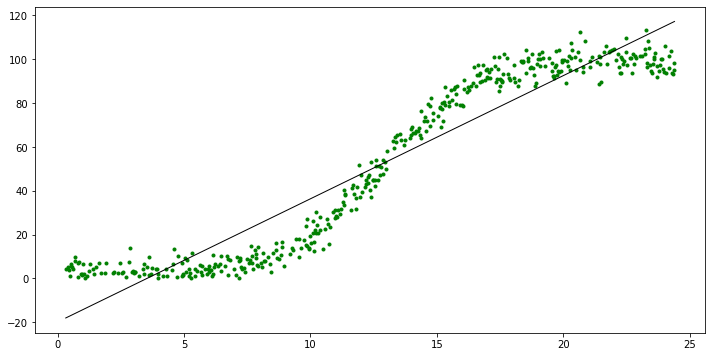

In [203]:
# Inspecting the fit using matplotlib
plt.plot(df['speed'], df['power'],  '.g')
plt.plot(df['speed'], y_pred, 'k-', label="model")


##### Importance of Coefficient of determination and correlation coefficient

if the cost is greater than 0 a quantity closely related to the cost is called the coefficient of determination, also known as the R-squared value. The purpose of the R-squared value is to measure how much of the variance in y (power) is determined by x (speed).

In this case coefficient of determination is 0.898 which means that explaines or measures 89% of the variance in power that is determined by speed.

coefficent of determination is calculated: 

$$ R^2 = 1 - \frac{\sum_i (y_i - m x_i - c)^2}{\sum_i (y_i - \bar{y})^2} $$

Taken from the lectures: https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb

Other than coefficent of determination I calcualted correlation between two variables, speed and power. Correlation is 0.94 and it indicates a strong positive correlation between speed and power. The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables. The values range between -1.0 and 1.0. A calculated number greater than 1.0 or less than -1.0 means that there was an error in the correlation measurement. A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive correlation. A correlation of 0.0 shows no linear relationship between the movement of the two variables.https://www.investopedia.com/terms/c/correlationcoefficient.asp

Acoording to numbers, coefficent of determination and correlation coefficient we could say that the strenght of the relationship between the relative movements of speed and power is linear which means, as speed increases, power would increase too, but that is not what we see from the plot. Regression line doesn't follow data and we could say that their relationship is not linear after all. 


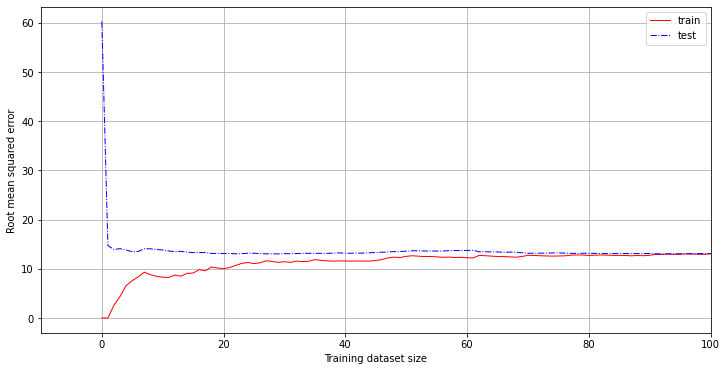

In [204]:
# For splitting data into train / test sets.
from sklearn.model_selection import train_test_split
# Code adjusted from: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
def train_test(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    train_errors, test_errors = [], []
    for n in range (1, len(X_train)):
        model.fit(X_train[:n], y_train[:n])
        y_train_predict = model.predict(X_train[:n])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:n], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    plt.plot(np.sqrt(train_errors), "r-", label="train")
    plt.plot(np.sqrt(test_errors), "b-.", label="test")
    plt.legend()
    plt.xlabel("Training dataset size")
    plt.ylabel("Root mean squared error")
    plt.grid()
    plt.xlim(-10, 100)

linear_reg = LinearRegression()
train_test(linear_reg, X, y)

##### What is Root Mean Square Error (RMSE)?


Root Mean Square Error (RMSE) is the standard deviation of the prediction errors. They are a measure of how far from the regression line data points are. RMSE is a measure of how spread out these residuals are. In other words, it tells us how concentrated the data is around the line of best fit. https://www.geeksforgeeks.org/root-mean-square-error-in-r-programming/ From the plot above we can see that RMSE is big when the training set is small, but as the training set increases error is getting smaller. This is something that should be investigated further as it doesn't give us precise data. 

##### Underfitting and Overfitting

Splitting a dataset might also be important for detecting if the model suffers from one of two very common problems, called underfitting and overfitting:

- Underfitting is usually the consequence of a model being unable to encapsulate the relations among data. For example, this can happen when trying to represent nonlinear relations with a linear model. Underfitted models will likely have poor performance with both training and test sets.

- Overfitting usually takes place when a model has an excessively complex structure and learns both the existing relations among data and noise. Such models often have bad generalization capabilities. Although they work well with training data, they usually yield poor performance with unseen (test) data. https://realpython.com/train-test-split-python-data/

In this case we are dealing with the problem of underfitting, that is to say, this model is being unable to encapsulate the relation among data. We can clearly see that in "Model 1: linear regression" plot as the regression line doesn't fit the data as it is straight and linear while data structure is non linear. Accordingly, I will look into other models to see if they are going to fit data structure more accurately. 

##### Polynomial regression

Polynomial regression is one of the most fundamental concepts used in data analysis and prediction. This is one of the regression technique which is used to predict the outcome. It is defined as the relationship between the independent and dependent variables when the dependent variable is related to the independent variable having some degree. It does not require the relationship between dependent and independent variables to be linear, so if the line is a curve than it may have any polynomial term.

The main difference between linear and polynomial regression is that linear regression requires the dependent and independent variables to be linearly related while this may better fit the line if we include any higher degree to the independent variable term in the equation. This is the equation:

Y= b0+a1x+a2x^2+a3x^3+…. anx^n


If we add higher degrees, then it turns the line into a curve that better fits the data. Generally, it is used when the points in the data set are scattered and the linear model is not able to describe the result clearly. We should always keep an eye on overfitting and underfitting while considering these degrees to the equation.

There are two techniques which are used in deciding the degree of the equation:

- Forward Selection: It is the method of increasing the degree until it is significant enough to define the model.

- Backward Selection: It is the method of decreasing the degree until it is significant enough to define the model.

https://www.educba.com/polynomial-regression/

As we have already tried linear regression and it didn't give us accurate prediction of data, polynomial regression has better conditions as the data structure/regression line is a curve which means it could have polynomial term and it would fit the data better. As we need to set the degree to the independent variable ourselves, I have tried with several different degrees and degree 3 showed the best fit. Firstly, I will show the linear regression and then polynomial regression to compare the models and see which one is a better fit. 

0.8984832870534454


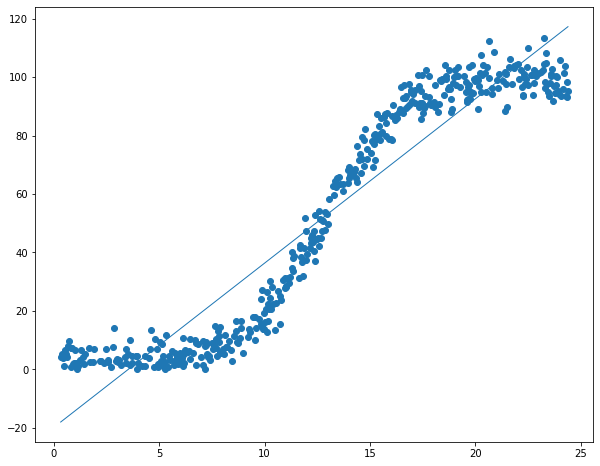

In [205]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
model_pred = lin_reg.predict(X)

plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, model_pred);
print(r2_score(y, model_pred))



0.9783216723216328


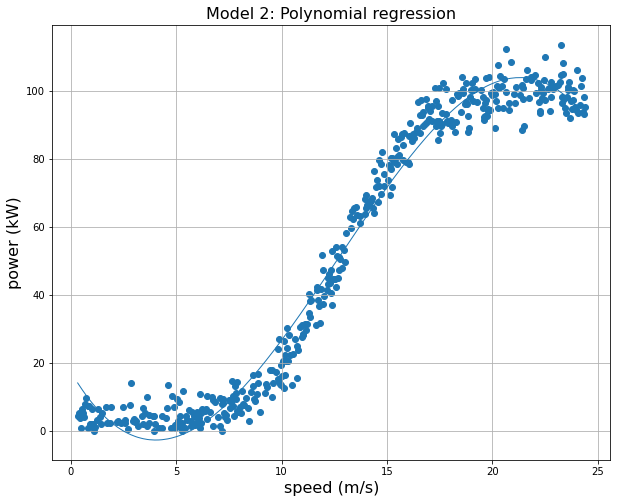

In [206]:
# Code adjusted from: https://medium.com/kharpann/performing-polynomial-regression-using-python-840eb666bfd8

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
y_pred = lin_reg_2.predict(X_poly)
plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, y_pred);
print(r2_score(y, y_pred))

plt.xlabel('speed (m/s)', fontsize='16')
plt.ylabel('power (kW)', fontsize='16')
plt.title("Model 2: Polynomial regression", fontsize='16')
plt.grid()


##### Model 3: Neural networks


Neural Networks are a class of models within the general machine learning literature. Neural networks are a specific set of algorithms that have revolutionized machine learning. They are inspired by biological neural networks and the current so-called deep neural networks have proven to work quite well. Neural Networks are themselves general function approximations, which is why they can be applied to almost any machine learning problem about learning a complex mapping from the input to the output space.

https://www.codementor.io/@james_aka_yale/a-gentle-introduction-to-neural-networks-for-machine-learning-hkijvz7lp


- Training set
The training set is what it sounds like. It’s the set of data used to train the model. During each epoch, our model will be trained over and over again on this same data in our training set, and it will continue to learn about the features of this data.The hope with this is that later we can deploy our model and have it accurately predict on new data that it’s never seen before. It will be making these predictions based on what it’s learned about the training data.

- Validation set
The validation set is a set of data, separate from the training set, that is used to validate our model during training. This validation process helps give information that may assist us with adjusting our hyperparameters.

Recall how we just mentioned that with each epoch during training, the model will be trained on the data in the training set. Well, it will also simultaneously be validated on the data in the validation set.during the training process, the model will be classifying the output for each input in the training set. After this classification occurs, the loss will then be calculated, and the weights in the model will be adjusted. Then, during the next epoch, it will classify the same input again.One of the major reasons we need a validation set is to ensure that our model is not overfitting to the data in the training set. 

- Test set
The test set is a set of data that is used to test the model after the model has already been trained. The test set is separate from both the training set and validation set.

After our model has been trained and validated using our training and validation sets, we will then use our model to predict the output of the unlabeled data in the test set.

One major difference between the test set and the two other sets is that the test set should not be labeled. The training set and validation set have to be labeled so that we can see the metrics given during training, like the loss and the accuracy from each epoch.


https://deeplizard.com/learn/video/Zi-0rlM4RDs


In [207]:
# Splitting the data set into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Some of the training set will be set to validation.  
# Ratio of train, test and validation is 60:20:20
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(270, 1)
(270,)
(91, 1)
(91,)
(90, 1)
(90,)


In [208]:
# Code adapted from the lectures: https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-neurons.ipynb
import tensorflow.keras as kr
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="zeros"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))

In [209]:
# Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order 
# moments.
# Code adapted fromL https://keras.io/api/optimizers/adam/
model.compile(kr.optimizers.Adam(lr=0.001), loss="mean_squared_error")
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [210]:

model.fit(X_train, y_train, epochs=500, batch_size=10, validation_data=(X_val, y_val))

Train on 270 samples, validate on 90 samples
Epoch 1/500
270/270 [==============================] - 0s 635us/sample - loss: 4306.6095 - val_loss: 4338.5563
Epoch 2/500
270/270 [==============================] - 0s 118us/sample - loss: 4203.7266 - val_loss: 4231.9912
Epoch 3/500
270/270 [==============================] - 0s 151us/sample - loss: 4095.4872 - val_loss: 4114.8707
Epoch 4/500
270/270 [==============================] - 0s 148us/sample - loss: 3971.9443 - val_loss: 3983.5567
Epoch 5/500
270/270 [==============================] - 0s 159us/sample - loss: 3832.4500 - val_loss: 3835.4363
Epoch 6/500
270/270 [==============================] - 0s 148us/sample - loss: 3677.8627 - val_loss: 3675.1477
Epoch 7/500
270/270 [==============================] - 0s 151us/sample - loss: 3521.0412 - val_loss: 3524.9968
Epoch 8/500
270/270 [==============================] - 0s 199us/sample - loss: 3386.1153 - val_loss: 3398.1385
Epoch 9/500
270/270 [==============================] - 0s 177us/sam

Epoch 74/500
270/270 [==============================] - 0s 166us/sample - loss: 805.4338 - val_loss: 810.5242
Epoch 75/500
270/270 [==============================] - 0s 155us/sample - loss: 786.9105 - val_loss: 793.1987
Epoch 76/500
270/270 [==============================] - 0s 151us/sample - loss: 770.2843 - val_loss: 777.3920
Epoch 77/500
270/270 [==============================] - 0s 151us/sample - loss: 752.8235 - val_loss: 761.4198
Epoch 78/500
270/270 [==============================] - 0s 144us/sample - loss: 736.3704 - val_loss: 746.2318
Epoch 79/500
270/270 [==============================] - 0s 140us/sample - loss: 719.2420 - val_loss: 727.7234
Epoch 80/500
270/270 [==============================] - 0s 159us/sample - loss: 703.0577 - val_loss: 711.8640
Epoch 81/500
270/270 [==============================] - 0s 144us/sample - loss: 687.7652 - val_loss: 695.6032
Epoch 82/500
270/270 [==============================] - 0s 159us/sample - loss: 671.9373 - val_loss: 681.9231
Epoch 83/5

Epoch 148/500
270/270 [==============================] - 0s 133us/sample - loss: 159.0987 - val_loss: 185.9075
Epoch 149/500
270/270 [==============================] - 0s 181us/sample - loss: 156.4863 - val_loss: 183.4188
Epoch 150/500
270/270 [==============================] - 0s 159us/sample - loss: 153.7596 - val_loss: 179.8206
Epoch 151/500
270/270 [==============================] - 0s 152us/sample - loss: 150.4303 - val_loss: 178.5201
Epoch 152/500
270/270 [==============================] - 0s 163us/sample - loss: 148.4781 - val_loss: 176.2401
Epoch 153/500
270/270 [==============================] - 0s 148us/sample - loss: 145.4199 - val_loss: 171.6933
Epoch 154/500
270/270 [==============================] - 0s 140us/sample - loss: 142.7905 - val_loss: 170.1319
Epoch 155/500
270/270 [==============================] - 0s 151us/sample - loss: 140.6197 - val_loss: 168.7152
Epoch 156/500
270/270 [==============================] - 0s 151us/sample - loss: 138.0114 - val_loss: 165.3061
E

270/270 [==============================] - 0s 137us/sample - loss: 67.3034 - val_loss: 86.1886
Epoch 223/500
270/270 [==============================] - 0s 174us/sample - loss: 66.8910 - val_loss: 86.0046
Epoch 224/500
270/270 [==============================] - 0s 162us/sample - loss: 66.5299 - val_loss: 84.7451
Epoch 225/500
270/270 [==============================] - 0s 140us/sample - loss: 65.8635 - val_loss: 85.1965
Epoch 226/500
270/270 [==============================] - 0s 155us/sample - loss: 66.0139 - val_loss: 83.8280
Epoch 227/500
270/270 [==============================] - 0s 148us/sample - loss: 65.2504 - val_loss: 83.6487
Epoch 228/500
270/270 [==============================] - 0s 155us/sample - loss: 64.6516 - val_loss: 83.5565
Epoch 229/500
270/270 [==============================] - 0s 148us/sample - loss: 64.1841 - val_loss: 82.1133
Epoch 230/500
270/270 [==============================] - 0s 155us/sample - loss: 63.9627 - val_loss: 82.5648
Epoch 231/500
270/270 [==========

270/270 [==============================] - 0s 159us/sample - loss: 42.9696 - val_loss: 54.3682
Epoch 298/500
270/270 [==============================] - 0s 155us/sample - loss: 42.7322 - val_loss: 54.3835
Epoch 299/500
270/270 [==============================] - 0s 140us/sample - loss: 42.2429 - val_loss: 53.5785
Epoch 300/500
270/270 [==============================] - 0s 148us/sample - loss: 42.1548 - val_loss: 53.3098
Epoch 301/500
270/270 [==============================] - 0s 159us/sample - loss: 42.0909 - val_loss: 52.6414
Epoch 302/500
270/270 [==============================] - 0s 151us/sample - loss: 42.0330 - val_loss: 52.0899
Epoch 303/500
270/270 [==============================] - 0s 163us/sample - loss: 41.8935 - val_loss: 52.3082
Epoch 304/500
270/270 [==============================] - 0s 139us/sample - loss: 41.4696 - val_loss: 51.3321
Epoch 305/500
270/270 [==============================] - 0s 151us/sample - loss: 41.1665 - val_loss: 53.0031
Epoch 306/500
270/270 [==========

270/270 [==============================] - 0s 140us/sample - loss: 27.4965 - val_loss: 36.2535
Epoch 373/500
270/270 [==============================] - 0s 148us/sample - loss: 27.3035 - val_loss: 35.1929
Epoch 374/500
270/270 [==============================] - 0s 151us/sample - loss: 27.1897 - val_loss: 35.5986
Epoch 375/500
270/270 [==============================] - 0s 140us/sample - loss: 27.0170 - val_loss: 35.4212
Epoch 376/500
270/270 [==============================] - 0s 144us/sample - loss: 27.1046 - val_loss: 35.1102
Epoch 377/500
270/270 [==============================] - 0s 148us/sample - loss: 26.7957 - val_loss: 35.2321
Epoch 378/500
270/270 [==============================] - 0s 144us/sample - loss: 26.6008 - val_loss: 34.8564
Epoch 379/500
270/270 [==============================] - 0s 144us/sample - loss: 26.4464 - val_loss: 34.9980
Epoch 380/500
270/270 [==============================] - 0s 140us/sample - loss: 26.7421 - val_loss: 33.9229
Epoch 381/500
270/270 [==========

270/270 [==============================] - 0s 148us/sample - loss: 20.6860 - val_loss: 27.3762
Epoch 448/500
270/270 [==============================] - 0s 151us/sample - loss: 20.3649 - val_loss: 27.1743
Epoch 449/500
270/270 [==============================] - 0s 155us/sample - loss: 20.8743 - val_loss: 28.1350
Epoch 450/500
270/270 [==============================] - 0s 144us/sample - loss: 20.4321 - val_loss: 27.0699
Epoch 451/500
270/270 [==============================] - 0s 144us/sample - loss: 20.4817 - val_loss: 27.2157
Epoch 452/500
270/270 [==============================] - 0s 148us/sample - loss: 20.2718 - val_loss: 26.8258
Epoch 453/500
270/270 [==============================] - 0s 155us/sample - loss: 20.1457 - val_loss: 26.8078
Epoch 454/500
270/270 [==============================] - 0s 126us/sample - loss: 20.2523 - val_loss: 27.4689
Epoch 455/500
270/270 [==============================] - 0s 118us/sample - loss: 20.3318 - val_loss: 26.5891
Epoch 456/500
270/270 [==========

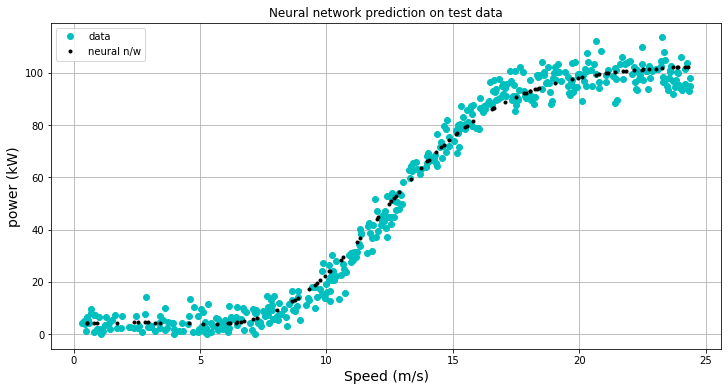

In [211]:
# Look at prediction for the test data - was not used in training.
plt.plot(X, y, 'co', label="data")
plt.plot(X_test, model.predict(X_test), 'k.', label="neural n/w")
plt.xlabel('Speed (m/s)', fontsize='14')
plt.ylabel('power (kW)', fontsize='14')
plt.title("Neural network prediction on test data")
plt.grid()
plt.legend()

In [214]:

# Predict from a single input value - seems sensible.
wind = [[28]]
print(model.predict(wind))

[[103.32102]]
